In [1]:
#get file
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving relatorio_alunos_cin_recrutamento_PET_corrigido.csv to relatorio_alunos_cin_recrutamento_PET_corrigido.csv
User uploaded file "relatorio_alunos_cin_recrutamento_PET_corrigido.csv" with length 206617 bytes


In [0]:
import csv
import pandas as pd

In [3]:
df = pd.read_csv('relatorio_alunos_cin_recrutamento_PET_corrigido.csv', encoding = 'utf-8')
df.head()

,MATRICULA,INGRESSO,ANO,SEMESTRE,CR,CURSO,GÊNERO,MODALIDADE
0,200870401,2016,2016,2,7.70,CIÊNCIA DA COMPUTAÇÃO,M,A0
1,200870401,2016,2017,1,6.70,CIÊNCIA DA COMPUTAÇÃO,M,A0
2,200870401,2016,2017,2,6.62,CIÊNCIA DA COMPUTAÇÃO,M,A0
3,200870401,2016,2018,1,6.25,CIÊNCIA DA COMPUTAÇÃO,M,A0
4,200870401,2016,2018,2,6.39,CIÊNCIA DA COMPUTAÇÃO,M,A0


## Modificações no DataFrame

---


*   A coluna *Modalidade* será substituída pelas colunas *Cotista: bool*, *Baixa Renda: bool*, *Deficiência: bool* e *Raça: category*, como feito no pré-processamento dos dados do SiSU.
*   As linhas correspondentes aos alunos que ingressaram no CIn em 2019 serão removidas, já que o período ainda não acabou e, portanto, esses alunos possuem CR 0.



In [0]:
# df = df.drop(columns = 'MATRICULA')

In [4]:
# adicionar info cota
df['COTISTA'] = False

df.loc[(df.MODALIDADE != 'AC') & (df.MODALIDADE != 'A0'), 'COTISTA'] = True

# adicionar info baixa renda
df['BAIXA_RENDA'] = False

df.loc[(df.MODALIDADE == 'L1') | (df.MODALIDADE == 'L2') | (df.MODALIDADE == 'L9') | (df.MODALIDADE == 'L10'), 'BAIXA_RENDA'] = True

# adicionar info deficiencia
df['DEFICIENCIA'] = False

df.loc[(df.MODALIDADE == 'L9') | (df.MODALIDADE == 'L10') | (df.MODALIDADE == 'L13') | (df.MODALIDADE == 'L14'), 'DEFICIENCIA'] = True

# adicionar info raca
df['RACA'] = 'BRANCO'

df.loc[(df.MODALIDADE == 'L2') | (df.MODALIDADE == 'L4') | (df.MODALIDADE == 'L6') | (df.MODALIDADE == 'L10') | (df.MODALIDADE == 'L14'), 'RACA'] = 'PRETO/PARDO/INDIGENA'

df = df.drop(columns='MODALIDADE')
df.head()

,MATRICULA,INGRESSO,ANO,SEMESTRE,CR,CURSO,GÊNERO,COTISTA,BAIXA_RENDA,DEFICIENCIA,RACA
0,200870401,2016,2016,2,7.70,CIÊNCIA DA COMPUTAÇÃO,M,False,False,False,BRANCO
1,200870401,2016,2017,1,6.70,CIÊNCIA DA COMPUTAÇÃO,M,False,False,False,BRANCO
2,200870401,2016,2017,2,6.62,CIÊNCIA DA COMPUTAÇÃO,M,False,False,False,BRANCO
3,200870401,2016,2018,1,6.25,CIÊNCIA DA COMPUTAÇÃO,M,False,False,False,BRANCO
4,200870401,2016,2018,2,6.39,CIÊNCIA DA COMPUTAÇÃO,M,False,False,False,BRANCO


In [5]:
df.INGRESSO.count()

3538

In [6]:
df = df.loc[(df.INGRESSO != 2019)]
df.INGRESSO.count()

3395

In [0]:
# df = df.loc[(df.ANO != 2019)]
# df.INGRESSO.count()

In [7]:
df['SEXO'] = 'Male'
df.loc[df['GÊNERO'] == 'F', 'SEXO'] = 'Female'
df = df.drop(columns='GÊNERO')
df.head()

,MATRICULA,INGRESSO,ANO,SEMESTRE,CR,CURSO,COTISTA,BAIXA_RENDA,DEFICIENCIA,RACA,SEXO
0,200870401,2016,2016,2,7.70,CIÊNCIA DA COMPUTAÇÃO,False,False,False,BRANCO,Male
1,200870401,2016,2017,1,6.70,CIÊNCIA DA COMPUTAÇÃO,False,False,False,BRANCO,Male
2,200870401,2016,2017,2,6.62,CIÊNCIA DA COMPUTAÇÃO,False,False,False,BRANCO,Male
3,200870401,2016,2018,1,6.25,CIÊNCIA DA COMPUTAÇÃO,False,False,False,BRANCO,Male
4,200870401,2016,2018,2,6.39,CIÊNCIA DA COMPUTAÇÃO,False,False,False,BRANCO,Male


In [8]:
# corrigindo tipos
print(df.dtypes)
df.CURSO = df.CURSO.astype('category')
df.RACA = df.RACA.astype('category')
df.SEXO = df.SEXO.astype('category')
print(df.dtypes)

MATRICULA        int64
INGRESSO         int64
ANO              int64
SEMESTRE         int64
CR             float64
CURSO           object
COTISTA           bool
BAIXA_RENDA       bool
DEFICIENCIA       bool
RACA            object
SEXO            object
dtype: object
MATRICULA         int64
INGRESSO          int64
ANO               int64
SEMESTRE          int64
CR              float64
CURSO          category
COTISTA            bool
BAIXA_RENDA        bool
DEFICIENCIA        bool
RACA           category
SEXO           category
dtype: object


## Analisando dados

---



In [9]:
ingresso_2016 = df.loc[(df.INGRESSO == 2016) & (df.ANO == 2016)]['INGRESSO'].count() - df.loc[(df.INGRESSO == 2016) & (df.ANO == 2016) & (df.SEMESTRE == 1)]['INGRESSO'].count()
ingresso_2017 = df.loc[(df.INGRESSO == 2017) & (df.ANO == 2017)]['INGRESSO'].count() - df.loc[(df.INGRESSO == 2017) & (df.ANO == 2017) & (df.SEMESTRE == 1)]['INGRESSO'].count()
ingresso_2018 = df.loc[(df.INGRESSO == 2018) & (df.ANO == 2018)]['INGRESSO'].count() - df.loc[(df.INGRESSO == 2018) & (df.ANO == 2018) & (df.SEMESTRE == 1)]['INGRESSO'].count()
print(f'2016: {ingresso_2016}, 2017: {ingresso_2017} e 2018: {ingresso_2018}')

2016: 279, 2017: 274 e 2018: 270


In [0]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [11]:
semestre_1_2016 = df.loc[(df.INGRESSO == 2016) & (df.ANO == 2016) & (df.SEMESTRE == 1)]
semestre_2_2016 = df.loc[(df.INGRESSO == 2016) & (df.ANO == 2016) & (df.SEMESTRE == 2)]
todos_2016 = pd.concat([semestre_1_2016, pd.DataFrame([semestre_2_2016.loc[index] for index in semestre_2_2016.index if semestre_2_2016.loc[index, 'MATRICULA'] not in list(semestre_1_2016.MATRICULA)])])

semestre_1_2017 = df.loc[(df.INGRESSO == 2017) & (df.ANO == 2017) & (df.SEMESTRE == 1)]
semestre_2_2017 = df.loc[(df.INGRESSO == 2017) & (df.ANO == 2017) & (df.SEMESTRE == 2)]
todos_2017 = pd.concat([semestre_1_2017, pd.DataFrame([semestre_2_2017.loc[index] for index in semestre_2_2017.index if semestre_2_2017.loc[index, 'MATRICULA'] not in list(semestre_1_2017.MATRICULA)])])

semestre_1_2018 = df.loc[(df.INGRESSO == 2018) & (df.ANO == 2018) & (df.SEMESTRE == 1)]
semestre_2_2018 = df.loc[(df.INGRESSO == 2018) & (df.ANO == 2018) & (df.SEMESTRE == 2)]
todos_2018 = pd.concat([semestre_1_2018, pd.DataFrame([semestre_2_2018.loc[index] for index in semestre_2_2018.index if semestre_2_2018.loc[index, 'MATRICULA'] not in list(semestre_1_2018.MATRICULA)])])

print(f'2016: {todos_2016.shape[0]}, 2017: {todos_2017.shape[0]} e 2018: {todos_2018.shape[0]}')

2016: 282, 2017: 279 e 2018: 278


A diferença entre os 2 cálculos se dá pelo fato de pessoas que entraram no 1º semestre se desligarem logo no primeiro período.

Cálculo de desistência

---

Os matriculados em 2019 são os que NÃO desistiram, portanto os que desistiram são aqueles que entraram em 2016, 2017 ou 2018 e não estão matriculados em 2019.


*   Juntar os que entraram em 2016, 2017 e 2018
*   Excluir aqueles que estão matriculados em 2019




In [0]:
# Contando todas as desistências
matriculados_2019 = df.loc[df.ANO == 2019]
todos = pd.concat([todos_2016, todos_2017, todos_2018], sort=False)

dropout = pd.DataFrame([todos.loc[index] for index in todos.index if todos.loc[index, 'MATRICULA'] not in list(matriculados_2019.MATRICULA)])

assert dropout.shape[0] == (todos.shape[0]-matriculados_2019.shape[0])

### Comparação entre sexo feminino e masculino

---



In [13]:
female_2016 = todos_2016.loc[todos_2016.SEXO == 'Female']
male_2016 = todos_2016.loc[todos_2016.SEXO == 'Male']

female_2017 = todos_2017.loc[todos_2017.SEXO == 'Female']
male_2017 = todos_2017.loc[todos_2017.SEXO == 'Male']

female_2018 = todos_2018.loc[todos_2018.SEXO == 'Female']
male_2018 = todos_2018.loc[todos_2018.SEXO == 'Male']

all_female = pd.concat([female_2016, female_2017, female_2018], sort=True)
all_male = pd.concat([male_2016, male_2017, male_2018], sort=True)

print(f'feminino: {all_female.shape[0]}, masculino: {all_male.shape[0]}.')
print('Porcentagem feminina: {0:.1f}%'.format(all_female.shape[0]/(all_female.shape[0]+all_male.shape[0])*100))

feminino: 104, masculino: 735.
Porcentagem feminina: 12.4%


Text(0.5, 0, '')

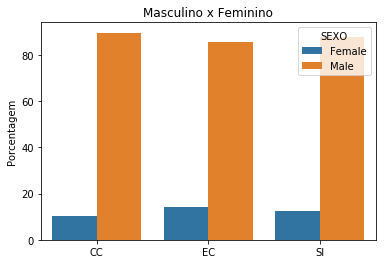

In [14]:
# Comparando quantidade
f_cursos = all_female.groupby('CURSO')['SEXO'].count()

m_cursos = all_male.groupby('CURSO')['SEXO'].count()

data = {'CURSO': ['CC', 'CC', 'EC', 'EC', 'SI', 'SI'],
       'SEXO': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
       'COUNT': [f_cursos[0]/(f_cursos[0]+m_cursos[0])*100, m_cursos[0]/(f_cursos[0]+m_cursos[0])*100,
                f_cursos[1]/(f_cursos[1]+m_cursos[1])*100, m_cursos[1]/(f_cursos[1]+m_cursos[1])*100,
                f_cursos[2]/(f_cursos[2]+m_cursos[2])*100, m_cursos[2]/(f_cursos[2]+m_cursos[2])*100]}

dfFM = pd.DataFrame(data=data)
ax = sns.barplot(x="CURSO", y="COUNT", hue="SEXO", data=dfFM)

ax.set_title("Masculino x Feminino")
ax.set_ylabel("Porcentagem")
ax.set_xlabel('')

Text(0.5, 0, '')

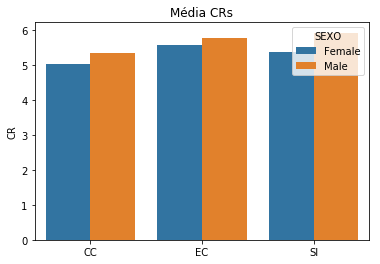

In [15]:
# Comparando média CRs

f = all_female.groupby('CURSO')['CR'].mean()

m = all_male.groupby('CURSO')['CR'].mean()

data = {'CURSO': ['CC', 'CC', 'EC', 'EC', 'SI', 'SI'],
       'SEXO': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
       'MEAN': [f[0], m[0], f[1], m[1], f[2], m[2]]}

dfFM = pd.DataFrame(data=data)
ax = sns.barplot(x="CURSO", y="MEAN", hue="SEXO", data=dfFM)

ax.set_title("Média CRs")
ax.set_ylabel("CR")
ax.set_xlabel('')

Há diferença significativa entre as amostras de notas do sexo masculino e do feminino?

---

Hipótese nula: as amostras são "iguais"

In [16]:
result = stats.anderson(pd.concat([all_female, all_male], sort=False).CR)
print(f"stat: {result.statistic}, pvalue: {result.critical_values}")

stat: 31.676603156329065, pvalue: [0.573 0.653 0.783 0.914 1.087]


In [17]:
stat, pvalue = stats.ttest_ind(all_female.CR, all_male.CR)
print(f"stat: {stat}, pvalue: {pvalue}")

stat: -0.881446206574836, pvalue: 0.3783294009690097


Não há diferença estatística, já que o pvalue ficou acima do nível de significância (0.05) e, portanto, a hipótese nula não foi refutada.

Text(0.5, 0, '')

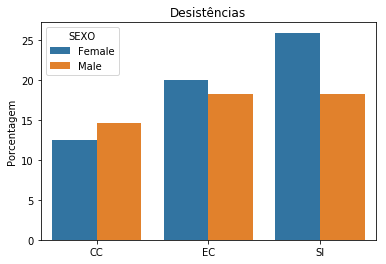

In [18]:
# Comparando desistências
f_dropout = dropout.loc[dropout.SEXO == 'Female']
m_dropout = dropout.loc[dropout.SEXO == 'Male']

f = f_dropout.groupby('CURSO')['SEXO'].count()
all_f = all_female.groupby('CURSO')['SEXO'].count()

m = m_dropout.groupby('CURSO')['SEXO'].count()
all_m = all_male.groupby('CURSO')['SEXO'].count()

data = {'CURSO': ['CC', 'CC', 'EC', 'EC', 'SI', 'SI'],
       'SEXO': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
       'COUNT': [f[0]/all_f[0] *100, m[0]/all_m[0] *100, f[1]/all_f[1] *100, m[1]/all_m[1] *100, f[2]/all_f[2] *100, m[2]/all_m[2] *100]}

dfFM = pd.DataFrame(data=data)
ax = sns.barplot(x="CURSO", y="COUNT", hue="SEXO", data=dfFM)

ax.set_title("Desistências")
ax.set_ylabel("Porcentagem")
ax.set_xlabel('')

### Comparação entre cotista e não-cotista

---



In [0]:
cotista = todos.loc[todos.COTISTA]
nao_cotista = todos.loc[todos.COTISTA == False]

baixa_renda = cotista.loc[cotista.BAIXA_RENDA]
deficiencia = cotista.loc[cotista.DEFICIENCIA]
racial = cotista.loc[cotista.RACA != 'BRANCO']

Text(0.5, 0, '')

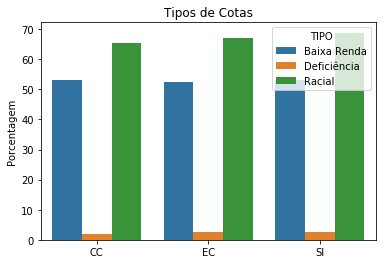

In [20]:
# Visualização de cotas
count_cotistas = cotista.groupby('CURSO')['COTISTA'].count()
count_br = baixa_renda.groupby('CURSO')['BAIXA_RENDA'].count()
count_d = deficiencia.groupby('CURSO')['DEFICIENCIA'].count()
count_r = racial.groupby('CURSO')['RACA'].count()

data = {'CURSO': ['CC', 'CC', 'CC', 'EC', 'EC', 'EC', 'SI', 'SI', 'SI'],
       'TIPO': ['Baixa Renda', 'Deficiência', 'Racial', 'Baixa Renda', 'Deficiência', 'Racial', 'Baixa Renda', 'Deficiência', 'Racial'],
       'COUNT': [count_br[0]/count_cotistas[0] * 100, count_d[0]/count_cotistas[0] * 100, count_r[0]/count_cotistas[0] * 100,
                count_br[1]/count_cotistas[1] * 100, count_d[1]/count_cotistas[1] * 100, count_r[1]/count_cotistas[1] * 100,
                count_br[2]/count_cotistas[2] * 100, count_d[2]/count_cotistas[2] * 100, count_r[2]/count_cotistas[2] * 100]}

dfC = pd.DataFrame(data=data)
ax = sns.barplot(x="CURSO", y="COUNT", hue="TIPO", data=dfC)

ax.set_title("Tipos de Cotas")
ax.set_ylabel("Porcentagem")
ax.set_xlabel('')

Text(0.5, 0, '')

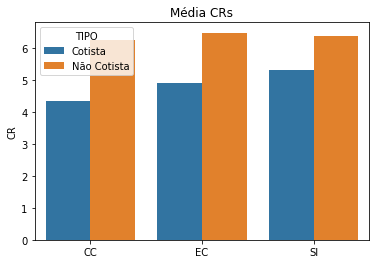

In [21]:
# Comparando média CRs
mean_c = cotista.groupby('CURSO')['CR'].mean()
mean_nao_c = nao_cotista.groupby('CURSO')['CR'].mean()

data = {'CURSO': ['CC', 'CC', 'EC', 'EC', 'SI', 'SI'],
       'TIPO': ['Cotista', 'Não Cotista', 'Cotista', 'Não Cotista', 'Cotista', 'Não Cotista'],
       'MEAN': [mean_c[0], mean_nao_c[0], mean_c[1], mean_nao_c[1], mean_c[2], mean_nao_c[2]]}

dfC = pd.DataFrame(data=data)
ax = sns.barplot(x="CURSO", y="MEAN", hue="TIPO", data=dfC)

ax.set_title("Média CRs")
ax.set_ylabel("CR")
ax.set_xlabel('')

Text(0.5, 0, '')

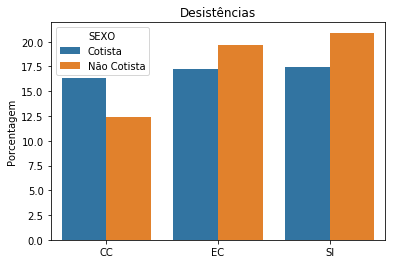

In [22]:
# Comparando desistências
c_dropout = dropout.loc[dropout.COTISTA]
nao_c_dropout = dropout.loc[dropout.COTISTA == False]

count_c_dropout = c_dropout.groupby('CURSO')['COTISTA'].count()
count_nao_c_dropout = nao_c_dropout.groupby('CURSO')['COTISTA'].count()

count_nao_cotistas = nao_cotista.groupby('CURSO')['COTISTA'].count()

data = {'CURSO': ['CC', 'CC', 'EC', 'EC', 'SI', 'SI'],
       'SEXO': ['Cotista', 'Não Cotista', 'Cotista', 'Não Cotista', 'Cotista', 'Não Cotista'],
       'COUNT': [count_c_dropout[0]/count_cotistas[0] * 100, count_nao_c_dropout[0]/count_nao_cotistas[0] * 100,
                count_c_dropout[1]/count_cotistas[1] * 100, count_nao_c_dropout[1]/count_nao_cotistas[1] * 100,
                count_c_dropout[2]/count_cotistas[2] * 100, count_nao_c_dropout[2]/count_nao_cotistas[2] * 100]}

dfFM = pd.DataFrame(data=data)
ax = sns.barplot(x="CURSO", y="COUNT", hue="SEXO", data=dfFM)

ax.set_title("Desistências")
ax.set_ylabel("Porcentagem")
ax.set_xlabel('')


### Comparação entre brancos x pretos/pardos/indígenas
---



In [0]:
b = todos.loc[todos.RACA == 'BRANCO']
ppi = todos.loc[todos.RACA == 'PRETO/PARDO/INDIGENA']

In [0]:
b_mean = b.groupby('CURSO')['CR'].mean()
ppi_mean = ppi.groupby('CURSO')['CR'].mean()

Text(0.5, 0, '')

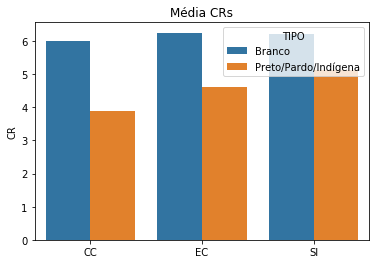

In [25]:
# Comparando média CRs

data = {'CURSO': ['CC', 'CC', 'EC', 'EC', 'SI', 'SI'],
       'TIPO': ['Branco', 'Preto/Pardo/Indígena', 'Branco', 'Preto/Pardo/Indígena', 'Branco', 'Preto/Pardo/Indígena'],
       'MEAN': [b_mean['CIÊNCIA DA COMPUTAÇÃO'], ppi_mean['CIÊNCIA DA COMPUTAÇÃO'], 
                b_mean['ENGENHARIA DA COMPUTAÇÃO'], ppi_mean['ENGENHARIA DA COMPUTAÇÃO'], 
                b_mean['SISTEMAS DE INFORMAÇÃO'], ppi_mean['SISTEMAS DE INFORMAÇÃO']]}

dfC = pd.DataFrame(data=data)
ax = sns.barplot(x="CURSO", y="MEAN", hue="TIPO", data=dfC)

ax.set_title("Média CRs")
ax.set_ylabel("CR")
ax.set_xlabel('')

Text(0.5, 0, '')

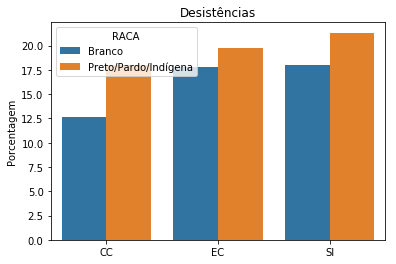

In [26]:
# Comparando desistências

b_dropout = dropout.loc[dropout.RACA == 'BRANCO']
ppi_dropout = dropout.loc[dropout.RACA == 'PRETO/PARDO/INDIGENA']

count_b_dropout = b_dropout.groupby('CURSO')['RACA'].count()
count_ppi_dropout = ppi_dropout.groupby('CURSO')['RACA'].count()

count_b = b.groupby('CURSO')['RACA'].count()
count_ppi = ppi.groupby('CURSO')['RACA'].count()

data = {'CURSO': ['CC', 'CC', 'EC', 'EC', 'SI', 'SI'],
       'RACA': ['Branco', 'Preto/Pardo/Indígena', 'Branco', 'Preto/Pardo/Indígena', 'Branco', 'Preto/Pardo/Indígena'],
       'COUNT': [count_b_dropout['CIÊNCIA DA COMPUTAÇÃO']/count_b['CIÊNCIA DA COMPUTAÇÃO'] * 100, count_ppi_dropout['CIÊNCIA DA COMPUTAÇÃO']/count_ppi['CIÊNCIA DA COMPUTAÇÃO'] * 100,
                count_b_dropout['ENGENHARIA DA COMPUTAÇÃO']/count_b['ENGENHARIA DA COMPUTAÇÃO'] * 100, count_ppi_dropout['ENGENHARIA DA COMPUTAÇÃO']/count_ppi['ENGENHARIA DA COMPUTAÇÃO'] * 100,
                count_b_dropout['SISTEMAS DE INFORMAÇÃO']/count_b['SISTEMAS DE INFORMAÇÃO'] * 100, count_ppi_dropout['SISTEMAS DE INFORMAÇÃO']/count_ppi['SISTEMAS DE INFORMAÇÃO'] * 100]}

dfR = pd.DataFrame(data=data)
ax = sns.barplot(x="CURSO", y="COUNT", hue="RACA", data=dfR)

ax.set_title("Desistências")
ax.set_ylabel("Porcentagem")
ax.set_xlabel('')

In [27]:
print(f"Contagem:\nQuantidade de alunos (que entraram a partir de 2016) no CIn: {todos.shape[0]}\nQuantidade de brancos: {b.shape[0]}\nQuantidade de negros/pardos/indígenas: {ppi.shape[0]}\nQuantidade de brancos desistentes: {b_dropout.shape[0]}\nQuantidade de pretos/pardos/indígenas desistentes: {ppi_dropout.shape[0]}")

Contagem:
Quantidade de alunos (que entraram a partir de 2016) no CIn: 839
Quantidade de brancos: 563
Quantidade de negros/pardos/indígenas: 276
Quantidade de brancos desistentes: 90
Quantidade de pretos/pardos/indígenas desistentes: 54


Text(0.5, 0, '')

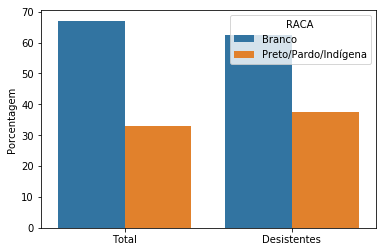

In [32]:
data = {'TIPO': ['Total', 'Total', 'Desistentes', 'Desistentes'],
       'RACA': ['Branco', 'Preto/Pardo/Indígena', 'Branco', 'Preto/Pardo/Indígena'],
       'COUNT': [b.shape[0]/todos.shape[0]*100, ppi.shape[0]/todos.shape[0]*100, b_dropout.shape[0]/dropout.shape[0]*100, ppi_dropout.shape[0]/dropout.shape[0]*100]}

dfC = pd.DataFrame(data=data)
ax = sns.barplot(x="TIPO", y="COUNT", hue="RACA", data=dfC)

ax.set_ylabel("Porcentagem")
ax.set_xlabel('')